<a href="https://colab.research.google.com/github/Omar-Works/ID-2024/blob/main/basiccnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef

def find_result():
    predictions = model.predict(test_generator)
    predictions = (predictions > 0.5).astype(int).flatten()  # Convert to binary labels

    # True labels
    y_true = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, predictions)
    classification_error = 1 - accuracy
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    specificity = recall_score(y_true, predictions, pos_label=0)
    fall_out = 1 - specificity
    mcc = matthews_corrcoef(y_true, predictions)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Classification Error:", classification_error)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Fall-Out:", fall_out)
    print("Matthews Correlation Coefficient:", mcc)
    print("Confusion Matrix:\n", confusion_matrix(y_true, predictions))
    print("Classification Report:\n", classification_report(y_true, predictions))


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import numpy as np
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Paths to your data directories
train_dir = '/content/drive/MyDrive/Malariav2/train'

# Image dimensions and batch size
img_size = (128, 128)
batch_size = 32

# Data generator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of training data for validation
)

# Training subset
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=42  # Set seed here
)

# Validation subset
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=42,
    shuffle=False
)

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,  # Ensure order consistency
    seed=42
)

Found 333 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [44]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model with dynamic validation split
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 474ms/step - accuracy: 0.4785 - loss: 2.4790 - val_accuracy: 0.5301 - val_loss: 0.9971
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.4981 - loss: 0.9390 - val_accuracy: 0.5301 - val_loss: 0.8003
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.5264 - loss: 0.7926 - val_accuracy: 0.5301 - val_loss: 0.6754
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.5925 - loss: 0.6740 - val_accuracy: 0.9518 - val_loss: 0.4998
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.7538 - loss: 0.6442 - val_accuracy: 0.6386 - val_loss: 0.6971
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.6147 - loss: 0.7034 - val_accuracy: 0.5301 - val_loss: 0.6652
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.5789 - loss: 0.6600 - val_accuracy: 0.6386 - val_loss: 0.5392
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.6233 - loss: 0.5726 - val_accuracy: 0.9518 - val_

In [45]:
find_result()

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
Accuracy: 0.8507462686567164
Classification Error: 0.14925373134328357
Precision: 0.6949152542372882
Recall (Sensitivity): 0.9534883720930233
F1 Score: 0.803921568627451
Specificity: 0.8021978021978022
Fall-Out: 0.19780219780219777
Matthews Correlation Coefficient: 0.7106238235638392
Confusion Matrix:
 [[73 18]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88        91
           1       0.69      0.95      0.80        43

    accuracy                           0.85       134
   macro avg       0.83      0.88      0.84       134
weighted avg       0.88      0.85      0.86       134



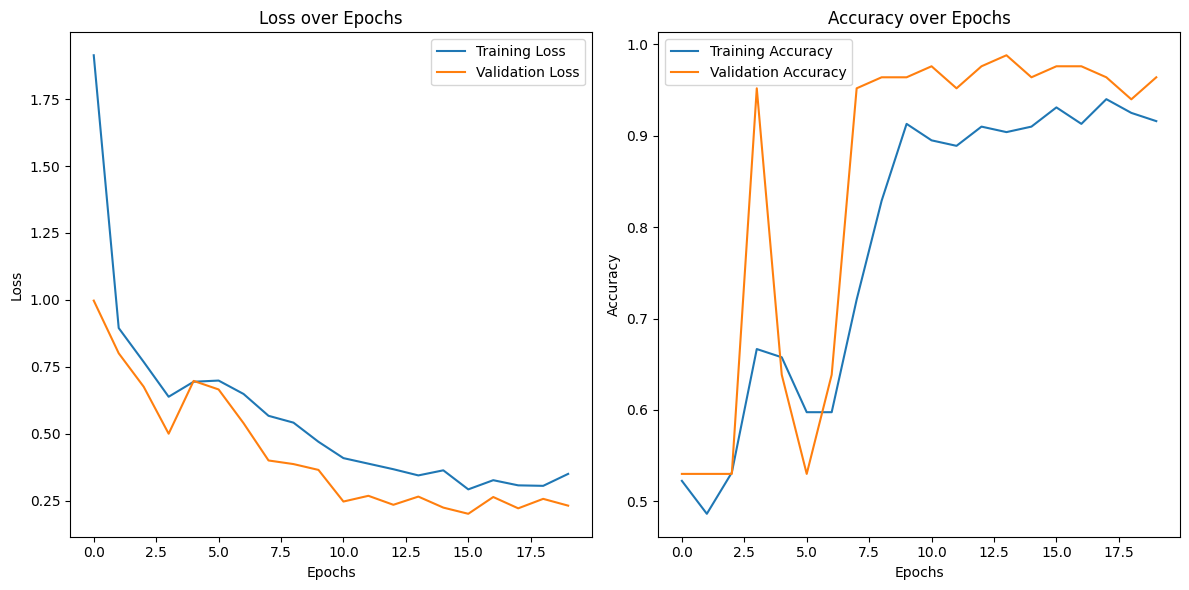

In [46]:
# Import Matplotlib
import matplotlib.pyplot as plt # This line imports the 'pyplot' module from Matplotlib and assigns it the alias 'plt'

# Plotting the loss
plt.figure(figsize=(12, 6))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()